<a href="https://colab.research.google.com/github/AkpuruenyaChukwu/Data_Analysis_for_Hospitals/blob/main/Data_Analysis_for_Hospitals_Hyperskill_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis for Hospitals**

### The Datasets for this code book is from the Data Analysis for Hospital project at [Hyperskill](https://hyperskill.org/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 8)


In [ ]:
general = pd.read_csv('/content/drive/MyDrive/Data projects/hospital data analysis/general.csv')
sports = pd.read_csv('/content/drive/MyDrive/Data projects/hospital data analysis/sports.csv')
prenatal = pd.read_csv('/content/drive/MyDrive/Data projects/hospital data analysis/prenatal.csv')


In [ ]:
general.head()

,Unnamed: 0,hospital,gender,age,...,mri,xray,children,months
0,0,general,man,33,...,NaN,NaN,NaN,NaN
1,1,general,man,48,...,NaN,NaN,NaN,NaN
2,2,general,woman,23,...,NaN,NaN,NaN,NaN
3,3,general,man,27,...,NaN,NaN,NaN,NaN
4,4,general,woman,22,...,NaN,f,NaN,NaN


In [ ]:
sports.head()

,Unnamed: 0,Hospital,Male/female,age,...,mri,xray,children,months
0,0,sports,female,20.0,...,t,f,NaN,NaN
1,1,sports,female,20.0,...,f,t,NaN,NaN
2,2,sports,male,16.0,...,f,t,NaN,NaN
3,3,sports,male,17.0,...,t,f,NaN,NaN
4,4,sports,male,19.0,...,f,t,NaN,NaN


In [ ]:
prenatal.head()

,Unnamed: 0,HOSPITAL,Sex,age,...,mri,xray,children,months
0,0,prenatal,NaN,27.0,...,NaN,f,0.0,3.0
1,1,prenatal,NaN,18.0,...,NaN,f,1.0,5.0
2,2,prenatal,NaN,34.0,...,NaN,f,1.0,5.0
3,3,prenatal,NaN,29.0,...,NaN,f,2.0,3.0
4,4,prenatal,NaN,33.0,...,NaN,f,1.0,7.0


In [ ]:
general.axes

[RangeIndex(start=0, stop=461, step=1),
 Index(['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi',
        'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray',
        'children', 'months'],
       dtype='object')]

In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  461 non-null    int64  
 1   hospital    461 non-null    object 
 2   gender      461 non-null    object 
 3   age         461 non-null    int64  
 4   height      461 non-null    float64
 5   weight      461 non-null    int64  
 6   bmi         461 non-null    float64
 7   diagnosis   461 non-null    object 
 8   blood_test  389 non-null    object 
 9   ecg         61 non-null     object 
 10  ultrasound  155 non-null    object 
 11  mri         0 non-null      float64
 12  xray        72 non-null     object 
 13  children    0 non-null      float64
 14  months      5 non-null      float64
dtypes: float64(5), int64(3), object(7)
memory usage: 54.2+ KB


In [ ]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   217 non-null    int64  
 1   Hospital     214 non-null    object 
 2   Male/female  214 non-null    object 
 3   age          214 non-null    float64
 4   height       214 non-null    float64
 5   weight       214 non-null    float64
 6   bmi          214 non-null    float64
 7   diagnosis    214 non-null    object 
 8   blood_test   0 non-null      float64
 9   ecg          214 non-null    object 
 10  ultrasound   0 non-null      float64
 11  mri          214 non-null    object 
 12  xray         214 non-null    object 
 13  children     0 non-null      float64
 14  months       0 non-null      float64
dtypes: float64(8), int64(1), object(6)
memory usage: 25.6+ KB


In [ ]:
prenatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  328 non-null    int64  
 1   HOSPITAL    325 non-null    object 
 2   Sex         0 non-null      float64
 3   age         325 non-null    float64
 4   height      325 non-null    float64
 5   weight      325 non-null    float64
 6   bmi         325 non-null    float64
 7   diagnosis   325 non-null    object 
 8   blood_test  325 non-null    object 
 9   ecg         325 non-null    object 
 10  ultrasound  325 non-null    object 
 11  mri         0 non-null      float64
 12  xray        325 non-null    object 
 13  children    325 non-null    float64
 14  months      325 non-null    float64
dtypes: float64(8), int64(1), object(6)
memory usage: 38.6+ KB


In [ ]:
#set columns  in sports and prenatal tables to be equal to general
cols = general.columns
sports.columns = cols
prenatal.columns = cols

In [ ]:
df = pd.concat([general, prenatal, sports], ignore_index = True)
df.drop(columns = "Unnamed: 0", inplace = True)
#df[c].fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hospital    1000 non-null   object 
 1   gender      675 non-null    object 
 2   age         1000 non-null   float64
 3   height      1000 non-null   float64
 4   weight      1000 non-null   float64
 5   bmi         1000 non-null   float64
 6   diagnosis   1000 non-null   object 
 7   blood_test  714 non-null    object 
 8   ecg         600 non-null    object 
 9   ultrasound  480 non-null    object 
 10  mri         214 non-null    object 
 11  xray        611 non-null    object 
 12  children    325 non-null    float64
 13  months      330 non-null    float64
dtypes: float64(6), object(8)
memory usage: 110.2+ KB


In [ ]:
df.tail()

,hospital,gender,age,height,...,mri,xray,children,months
1001,sports,male,22.0,6.777,...,f,t,NaN,NaN
1002,sports,male,20.0,5.400,...,t,f,NaN,NaN
1003,sports,male,17.0,6.089,...,f,f,NaN,NaN
1004,sports,female,16.0,6.176,...,f,t,NaN,NaN
1005,sports,female,18.0,6.692,...,t,f,NaN,NaN


In [ ]:
df.dropna(how='all', inplace=True)
#Make gender column same coding to aid analysis and visualization
df['gender'] = df['gender'].str.replace('woman', 'f').replace('female', 'f')
df['gender'] = df['gender'].str.replace('man', 'm').replace('male', 'm')
#make all gender rows in prenatal hospital female
df.loc[df['hospital'] == 'prenatal', 'gender'] ='f'


In [ ]:
#Replace all absent test results with 0
col_na = ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
for c in col_na:
    df.fillna( {c:0}, inplace=True)
print(df.shape)

(1000, 14)


# Analysis Questions
Which hospital has the highest number of patients?


What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.

What share of the patients in the sports hospital suffers from dislocation-related issues? Round the result to the third decimal place.

What is the difference in the median ages of the patients in the general and sports hospitals?

After data processing at the previous stages, the blood_test column has three values: t = a blood test was taken, f = a blood test wasn't taken, and 0 = there is no information.

In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column among all the hospitals)?

How many blood tests were taken?

In [ ]:
#Which hospital has the highest number of patients?
df.groupby("hospital")["diagnosis"].describe()

,count,unique,top,freq
hospital,,,,
general,461,7,cold,178
prenatal,325,2,pregnancy,313
sports,214,5,sprain,81


In [ ]:
#What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.
df.groupby("hospital")["diagnosis"].value_counts()

hospital  diagnosis  
general   cold           178
          stomach        150
          heart           56
          dislocation     25
          fracture        24
          sprain          23
          pregnancy        5
prenatal  pregnancy      313
          cold            12
sports    sprain          81
          dislocation     61
          fracture        61
          stomach          7
          cold             4
Name: count, dtype: int64

In [ ]:
stomach_count = df[(df["hospital"] == "general") & (df["diagnosis"] == "stomach")].shape[0]
stomach_share = round(stomach_count/general.shape[0], 3)
stomach_share

0.325

In [ ]:
#What share of the patients in the sports hospital suffers from dislocation-related issues? Round the result to the third decimal place.
dislocation_count = df[(df["hospital"] == "sports") & (df["diagnosis"] == "dislocation")].shape[0]
dislocation_share = round(dislocation_count/sports.shape[0], 3)
dislocation_share

0.281

In [ ]:
#What is the difference in the median ages of the patients in the general and sports hospitals?
median_difference_general_sport = general["age"].median() - sports["age"].median()
median_difference_general_sport

19.0

In [ ]:
#In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column among all the hospitals)?
df.groupby('hospital')['blood_test'].value_counts()

hospital  blood_test
general   f             206
          t             183
          0              72
prenatal  t             325
sports    0             214
Name: count, dtype: int64

# Data Visualization Questions

What is the most common age of a patient among all hospitals? Plot a histogram and choose one of the following age ranges: 0-15, 15-35, 35-55, 55-70, or 70-80.


What is the most common diagnosis among patients in all hospitals? Create a pie chart.


Build a violin plot of height distribution by hospitals. Try to answer the questions. What is the main reason for the gap in values? Why there are two peaks, which correspond to the relatively small and big values? No special form is required to answer this question.


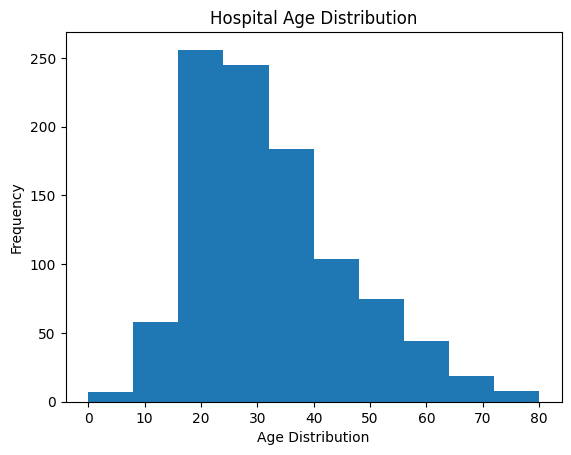

In [ ]:
#What is the most common age of a patient among all hospitals
plt.hist(df["age"])
plt.xlabel("Age Distribution")
plt.ylabel("Frequency")
plt.title("Hospital Age Distribution")
plt.show()

The answer to the 1st question: 15 -35


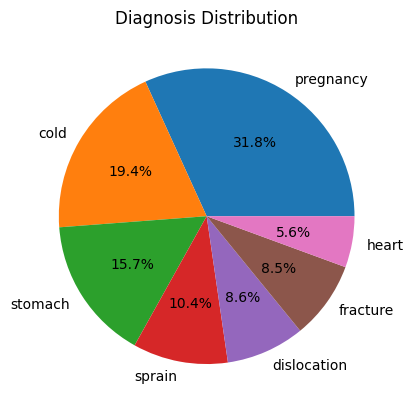

In [ ]:
# What is the most common diagnosis among patients in all hospitals? Create a pie chart.
plt.pie(df["diagnosis"].value_counts(), labels = df["diagnosis"].value_counts().index, autopct = '%1.1f%%')
plt.title("Diagnosis Distribution")
plt.show()

The answer to the 2nd question: pregnancy



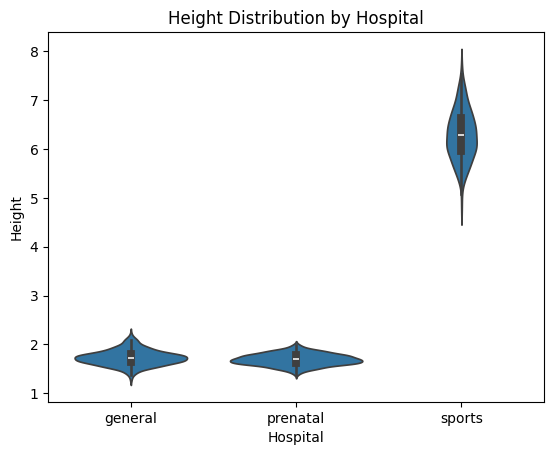

In [ ]:
#Build a violin plot of height distribution by hospitals. Try to answer the questions.
# What is the main reason for the gap in values? Why there are two peaks, which correspond to the relatively small and big values? No special form is required to answer this question.

sns.violinplot(x= df["hospital"], y = df["height"], data = df)
plt.title("Height Distribution by Hospital")
plt.xlabel("Hospital")
plt.ylabel("Height")
plt.show()


The answer to the 3rd question: It's because the sports hospital has taller patients and are likely using a different unit of measurement.